In [1]:
import pandas as pd
import numpy as np
import random
import math
import timeit
import itertools
import warnings
import pickle
import feather
import gc
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join, isfile
from collections import Counter

warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, formatter={'float': lambda x: "{0:0.2f}".format(x)})
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
mainPath = "../../data"
beacons = join(mainPath, "beacon")
testSets = join(beacons, "testsets")
models = join(mainPath, "models")
ceuPath = join(beacons, "CEU")
opensnpPath = join(beacons, "OpenSNP")

### 1D Plot

In [3]:
def plot_1d_boxplot(data_a, w):        
    ticks = ['5', '10', '15', '20']

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig = plt.figure()
    bpr = plt.boxplot(list(data_a), positions=np.array(range(len(data_a)))*2.0, sym='', widths=0.3)

    # Colors
    set_box_color(bpr, '#2C7FB8')
    #plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.legend(prop={'size': 7}, fancybox=True, loc=1)

    # Axes setup
    plt.xticks(range(0, len(ticks) * 2, 2), ticks)
    plt.xlim(-2, len(ticks)*2)
    plt.tight_layout()
    
    #plt.title('Accuracy Values of Different Algorithms', fontsize=11)
    plt.xlabel('Number of Clusters (m\')', fontsize=11)
    plt.ylabel(which[w], fontsize=11)
    plt.ylim(0, 1.05)

    plt.gca().yaxis.grid(linestyle='dotted')
    #plt.savefig('3O-'+which[w]+'.png', dpi=1000,bbox_inches="tight")

### 2D Plot

In [40]:
def plot_2d_boxplot(data_a, data_b, x_elements, x_label, y_label, nycounts, filename):        
    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig,ax = plt.subplots()
    bpl = plt.boxplot(list(data_a), sym='', positions=np.array(range(len(data_a)))*4.0-0.5, widths=0.5,autorange=True)
    bps = plt.boxplot(list(data_b), sym='', positions=np.array(range(len(data_b)))*4.0+0.5, widths=0.5,autorange=True)
   
    # Colors    
    set_box_color(bpl, '#2C7FB8')
    set_box_color(bps, '#D95F0E')
            
    plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.plot([], c='#D95F0E', label='Fuzzy Clustering')
    
    # Axes setup
    plt.legend(prop={'size': 8}, loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=3,fancybox=True,shadow=True)
  
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.ylim(-0.09, 1.05)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.gca().yaxis.grid(linestyle='dotted')
    
    # Second Axis
    ax2 = ax.twinx() 
    ax2.set_ylabel('Number of No-Yes Responses',  fontsize=13)
    ax2.plot(np.arange(0, len(x_elements)*4, 4), nycounts,'--bo', color='tab:red', label='Number of No-Yes Responses')
    ax2.set_ylim([-4000,31500])
    ax2.legend(prop={'size': 8}, fancybox=True, loc=4)

    plt.xticks(range(0, len(x_elements)*6, 4), x_elements)
    plt.xlim(-2, len(x_elements)*4)

    plt.tight_layout()
    fig.tight_layout()
    
    plt.savefig(filename+"_"+y_label+'.png', dpi=500,bbox_inches="tight")

### 3D Plot

In [50]:
def plot_3d_boxplot(data_a, data_b, data_c, x_elements, x_label, y_label, nycounts, filename):        
    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig,ax = plt.subplots()
    bpl = plt.boxplot(list(data_a), sym='', positions=np.array(range(len(data_a)))*4.0-0.7, widths=0.5,autorange=True)
    bpr = plt.boxplot(list(data_b), sym='', positions=np.array(range(len(data_b)))*4.0    , widths=0.5,autorange=True)
    bps = plt.boxplot(list(data_c), sym='', positions=np.array(range(len(data_c)))*4.0+0.7, widths=0.5,autorange=True)
   
    # Colors    
    set_box_color(bpl, '#2C7FB8')
    set_box_color(bpr, '#D95F0E')
    set_box_color(bps, '#8856A7')
            
    plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.plot([], c='#D95F0E', label='Fuzzy Clustering')
    plt.plot([], c='#8856A7', label='Baseline Algorithm')
    
    # Axes setup
    plt.legend(prop={'size': 8}, loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=3,fancybox=True,shadow=True)
  
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.ylim(-0.09, 1.05)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.gca().yaxis.grid(linestyle='dotted')
    
    # Second Axis
    ax2 = ax.twinx() 
    ax2.set_ylabel('Number of No-Yes Responses',  fontsize=13)
    ax2.plot(np.arange(0, len(x_elements)*4, 4), nycounts,'--bo', color='tab:red', label='Number of No-Yes Responses')
    ax2.set_ylim([-9000,61500])
    ax2.legend(prop={'size': 8}, fancybox=True, loc=4)

    plt.xticks(range(0, len(x_elements)*6, 4), x_elements)
    plt.xlim(-2, len(x_elements)*4)

    plt.tight_layout()
    fig.tight_layout()
    
    plt.savefig(filename+"_"+y_label+'.png', dpi=500,bbox_inches="tight")

In [42]:
# For each algorithm, For each experiment, For each run, For each metric + No-Yes Dictionary

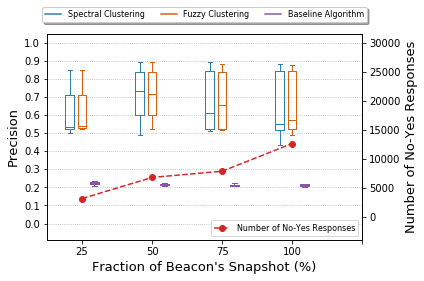

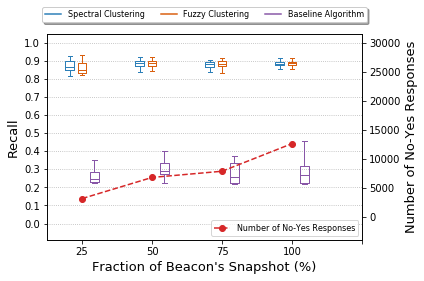

In [43]:
run_count = 20
x_elements = np.array([25, 50, 75, 100])
parameter_count = len(x_elements)

with open("results/v4_E5_PartialSnapshot.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j,1]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Fraction of Beacon\'s Snapshot (%)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e5")

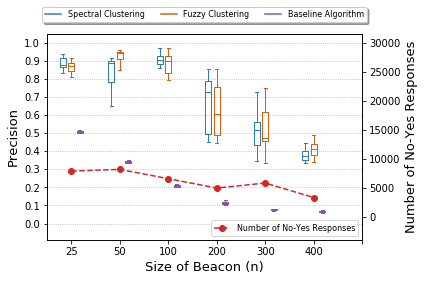

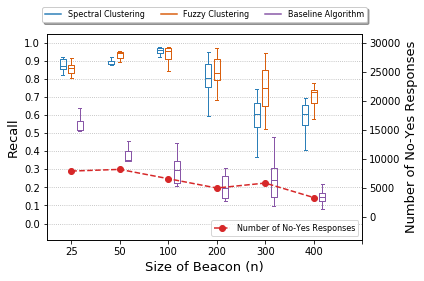

In [44]:
run_count = 20
x_elements = np.array([25, 50, 100, 200, 300, 400])
parameter_count = len(x_elements)

with open("results/v4_E4_VaryBeaconRatio.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Size of Beacon (n)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e4")

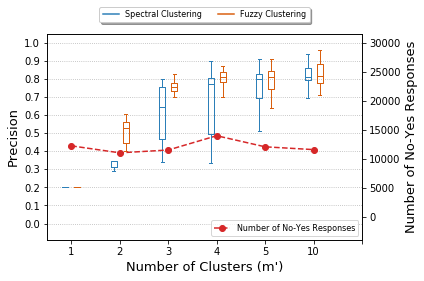

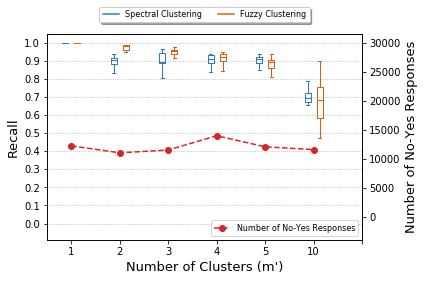

In [45]:
run_count = 20
x_elements = np.array([1, 2, 3, 4, 5, 10])
parameter_count = len(x_elements)

with open("results/v4_E3_VaryCluster.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Number of Clusters (m\')'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_2d_boxplot(res[0, :, :, i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e3")

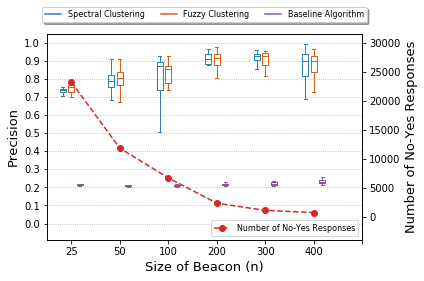

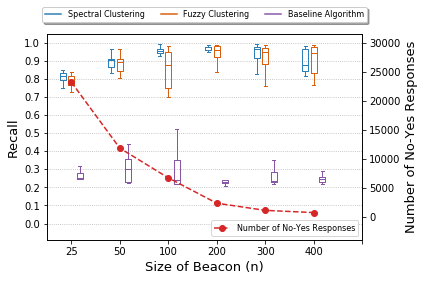

In [46]:
run_count = 20
x_elements = np.array([25, 50, 100, 200, 300, 400])
parameter_count = len(x_elements)

with open("results/v4_E2_VaryBeacon.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Size of Beacon (n)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e2")

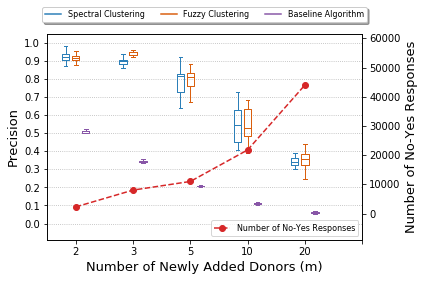

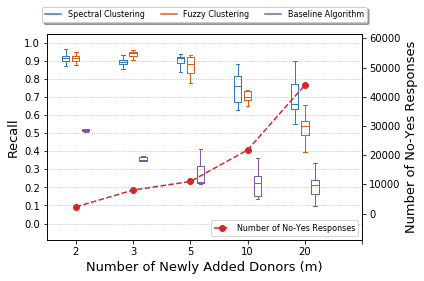

In [51]:
run_count = 20
x_elements = np.array([2, 3, 5, 10, 20])
parameter_count = len(x_elements)

with open("results/v4_E1_VaryAdded.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Number of Newly Added Donors (m)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e1")

# CEU

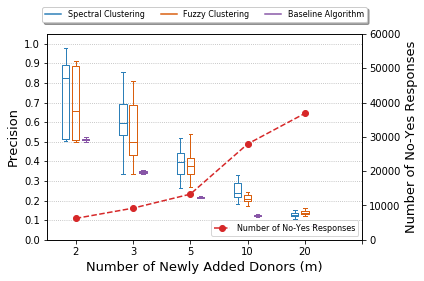

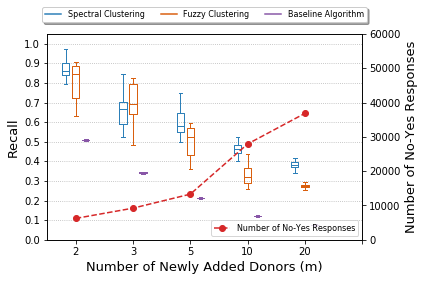

In [201]:
run_count = 20
x_elements = np.array([2, 3, 5, 10, 20])
parameter_count = len(x_elements)

with open("results/v4_F1_VaryAdded.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Number of Newly Added Donors (m)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e1")

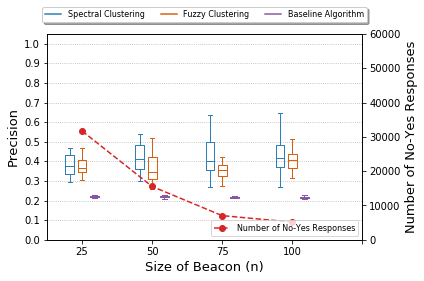

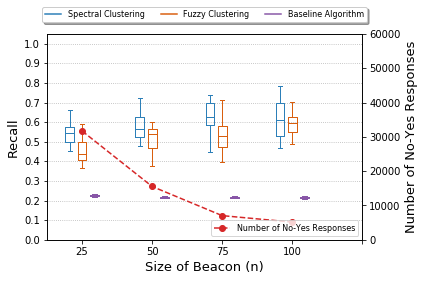

In [202]:
run_count = 20
x_elements = np.array([25, 50, 75, 100])
parameter_count = len(x_elements)

with open("results/v4_F2_VaryBeacon.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Size of Beacon (n)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e2")

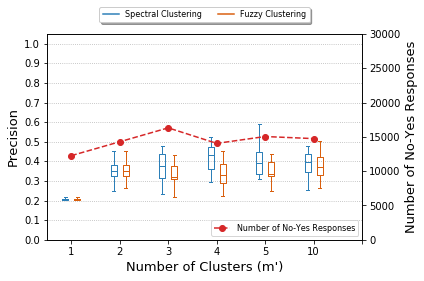

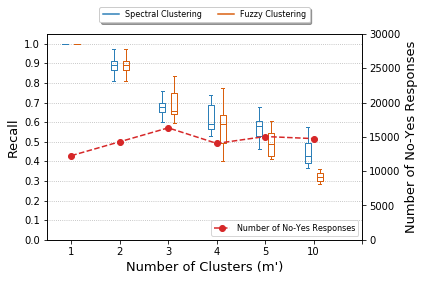

In [203]:
run_count = 20
x_elements = np.array([1, 2, 3, 4, 5, 10])
parameter_count = len(x_elements)

with open("results/v4_F3_VaryCluster.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Number of Clusters (m\')'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_2d_boxplot(res[0, :, :, i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e3")

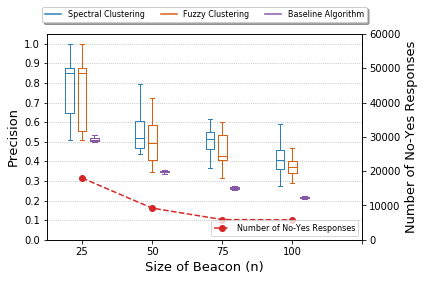

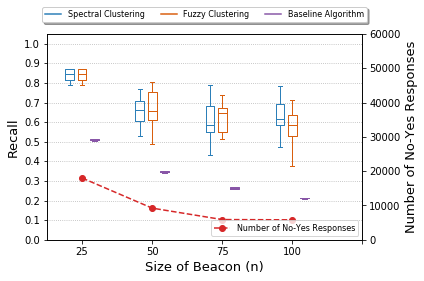

In [204]:
run_count = 20
x_elements = np.array([25, 50, 75, 100])
parameter_count = len(x_elements)

with open("results/v4_F4_VaryBeaconRatio.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Size of Beacon (n)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e4")

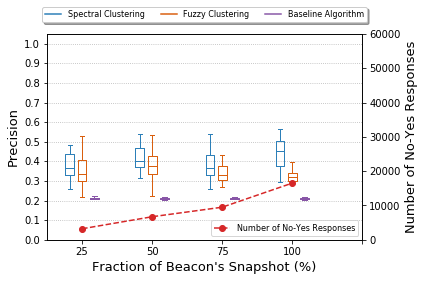

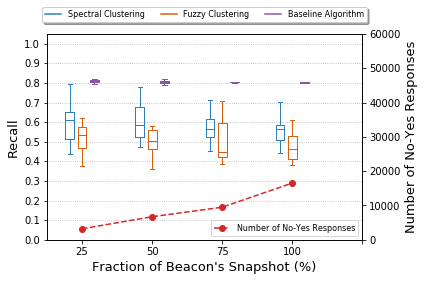

In [205]:
run_count = 20
x_elements = np.array([25, 50, 75, 100])
parameter_count = len(x_elements)

with open("results/v4_F5_PartialSnapshot.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j,1]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Fraction of Beacon\'s Snapshot (%)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_boxplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e5")

# MAF Analysis on Partial Snapshot

In [207]:
run_count = 20
x_elements = np.array([25, 50, 75, 100])
parameter_count = len(x_elements)

with open(join(opensnpPath, "MAF.pickle"), 'rb') as handle:
    maf = pickle.load(handle)

with open("results/v4_E2_VaryBeacon.pickle", 'rb') as file:
    _, nys = pickle.load(file)

In [208]:
# 1st index = Snapshot value (0: 25, 1: 50, 2: 75, 3: 100)
# 2nd index = Experiment value (0,19)
def mean_maf(indices, threshold):
    return np.sum(maf.iloc[indices]["maf"] < threshold)

In [219]:
all_50 = np.mean([mean_maf(nys[1,i], 1) for i in range(run_count)])
all_400 = np.mean([mean_maf(nys[5,i], 1) for i in range(run_count)])
print("Total No-Yes\nBeacon Size=50: ",all_50,"\nBeacon Size=400: ",all_400)
print("Ratio= ", (all_50-all_400)*100 // all_50)

Total No-Yes
Beacon Size=50:  11813.0 
Beacon Size=400:  696.9
Ratio=  94.0


In [227]:
threshold = 0.01
some_50 = np.mean([mean_maf(nys[0,i], threshold) for i in range(run_count)])
some_400 = [mean_maf(nys[5,i], threshold) for i in range(run_count)]
some_400 = np.mean(some_400)
print("Total No-Yes\nBeacon Size=50: ",some_50,"\nBeacon Size=400: ",some_400)
print("Ratio= ", (some_50-some_400)*100 // some_50)

Total No-Yes
Beacon Size=50:  600.05 
Beacon Size=400:  287.55
Ratio=  52.0


## Line Plot

In [ ]:
2: 70
3: 43
5: 48
10: 44
20: 31.4

In [ ]:
top1s = []
top3s = []
for i in [2,3,5,10,20]:
    with open(join(beacons, str(i)+".pkl"), 'rb') as f:
        t = pickle.load(f)
    top1s.append(np.mean(t[0]))
    top3s.append(np.mean(t[1]))

In [18]:
top1s = np.array([1, 0.7, 0.43, 0.48, 0.44, 0.314]) * 100
random_guess = np.array([1, 0.5, 0.33, 0.20, 0.10, 0.05]) * 100

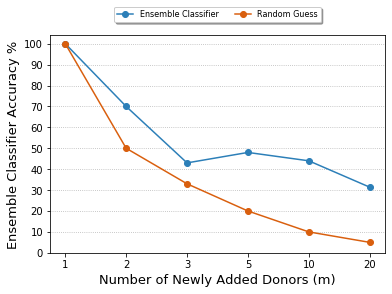

In [33]:
plt.ylabel("Ensemble Classifier Accuracy %", fontsize=13)
plt.xlabel("Number of Newly Added Donors (m)", fontsize=13)
plt.yticks(np.arange(0,101,10))
plt.ylim(0,104)
my_xticks = ['1', '2','3','5','10','20']
plt.xticks(np.array([0,1,2,3,4,5]), my_xticks)
plt.plot(top1s, '-o',c='#2C7FB8', label="Ensemble Classifier")
plt.plot(random_guess, '-o',c='#D95F0E', label="Random Guess")

# Axes setup
plt.legend(prop={'size': 8}, loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=3,fancybox=True,shadow=True)

plt.gca().yaxis.grid(linestyle='dotted')
plt.savefig('phenotype.png', format='png', dpi=500)

In [ ]:
'''
def plot_3d_boxplot(data_a, data_b, data_c, w):
    if w == 2:
        data_a *= 100
        data_b *= 100
        data_c *= 100
        
    ticks = ['1','2', '3', '5', '10', '20']

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig,ax = plt.subplots()
    bpl = plt.boxplot(list(data_a), positions=np.array(range(len(data_a)))*3.0-0.5, sym='', widths=0.3,autorange=True)
    bpr = plt.boxplot(list(data_b), positions=np.array(range(len(data_b)))*3.0, sym='', widths=0.3,autorange=True)
    bps = plt.boxplot(list(data_c), positions=np.array(range(len(data_c)))*3.0+0.5, sym='', widths=0.3,autorange=True)
   
    # Colors    
    set_box_color(bpl, '#2C7FB8')
    set_box_color(bpr, '#D95F0E')
    set_box_color(bps, '#8856A7')
            
    plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.plot([], c='#D95F0E', label='Fuzzy Clustering')
    plt.plot([], c='#8856A7', label='Baseline Algorithm')

    # Axes setup
    plt.legend(prop={'size': 7}, fancybox=True, loc=1)
    plt.xticks(range(0, len(ticks) * 3, 4), ticks)
    plt.xlim(-2, len(ticks)*3)
    plt.tight_layout()

    #plt.title('Accuracy Values of Different Algorithms', fontsize=11)
    plt.xlabel('Number of Newly Added Donors (m)', fontsize=11)
    plt.ylabel(which[w], fontsize=11)
    plt.ylim(0, 1.05)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.gca().yaxis.grid(linestyle='dotted')

    #plt.savefig('1O-'+which[w]+'.png', dpi=1000,bbox_inches="tight")
    


def plot_3d_violinplot(data_a, data_b, data_c, w):
    ticks = ['1','2', '3', '5', '10', '20']

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig,ax = plt.subplots()

    bpl = plt.violinplot(list(data_a), positions=np.array(range(len(data_a)))*4.0-0.5, widths=0.4,showmeans = True)
    bpr = plt.violinplot(list(data_b), positions=np.array(range(len(data_b)))*4.0, widths=0.4,showmeans = True)
    bps = plt.violinplot(list(data_c), positions=np.array(range(len(data_c)))*4.0+0.5, widths=0.4,showmeans = True)
    plots = [bpl, bpr, bps]
    colors = ['#2C7FB8','#D95F0E','#8856A7']
    parts = ['cbars','cmins','cmaxes','cmeans']
    
    # Colors    
    for i in range(3):
        for pc in plots[i]['bodies']:
            pc.set_facecolor(colors[i])
            pc.set_edgecolor(colors[i])
            pc.set_alpha(0.5)
            pc.set_linewidth(1)
        for b in parts:
            plots[i][b].set_facecolor("black")
            plots[i][b].set_edgecolor("black")
            plots[i][b].set_alpha(0.5)
            plots[i][b].set_linewidth(1)


    plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.plot([], c='#D95F0E', label='Fuzzy Clustering')
    plt.plot([], c='#8856A7', label='Baseline Algorithm')

    # Axes setup
    plt.legend(prop={'size': 7}, fancybox=True, loc=1)
    plt.xticks(range(0, len(ticks) * 3, 4), ticks)
    plt.xlim(-2, len(ticks)*3)
    plt.tight_layout()

    #plt.title('Accuracy Values of Different Algorithms', fontsize=11)
    plt.xlabel('Number of Newly Added Donors (m)', fontsize=11)
    plt.ylabel(which[w], fontsize=11)
    plt.ylim(0, 1.05)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.gca().yaxis.grid(linestyle='dotted')

    #plt.savefig('1V-'+which[w]+'.png', dpi=500,bbox_inches="tight")

# Sokal-Michener
from sklearn.metrics.pairwise import pairwise_distances

n = 5
m = np.mod(np.random.permutation(n*n).reshape(n,n),2)  
print(m)
print()

x = pairwise_distances(m, metric = "sokalmichener", n_jobs=-1)
y = pairwise_distances(m, metric = "rogerstanimoto", n_jobs=-1)
print(x)
print()
print(y)

print(np.sum(x != y))
'''

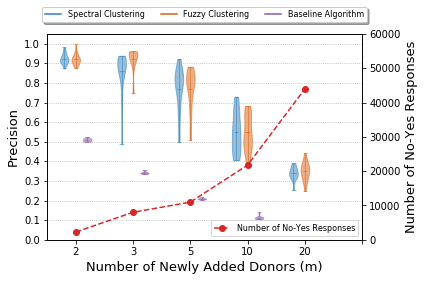

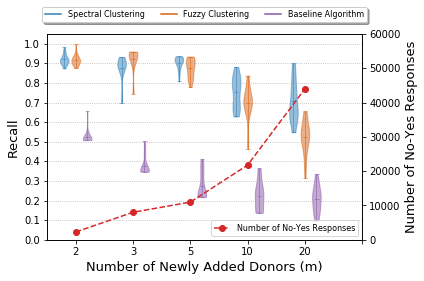

In [206]:
'''
def plot_3d_violinplot(data_a, data_b, data_c, x_elements, x_label, y_label, nycounts, filename): 

    def set_box_color(bp, color):
        plt.setp(bp['boxes'], color=color)
        plt.setp(bp['whiskers'], color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color=color)

    fig,ax = plt.subplots()

    bpl = plt.violinplot(list(data_a), positions=np.array(range(len(data_a)))*4.0-0.8, widths=0.6,showmeans = True)
    bpr = plt.violinplot(list(data_b), positions=np.array(range(len(data_b)))*4.0, widths=0.6,showmeans = True)
    bps = plt.violinplot(list(data_c), positions=np.array(range(len(data_c)))*4.0+0.8, widths=0.6,showmeans = True)
    plots = [bpl, bpr, bps]
    colors = ['#2C7FB8','#D95F0E','#8856A7']
    parts = ['cbars','cmins','cmaxes','cmeans']
    
    # Colors    
    for i in range(3):
        for pc in plots[i]['bodies']:
            pc.set_facecolor(colors[i])
            pc.set_edgecolor(colors[i])
            pc.set_alpha(0.5)
            pc.set_linewidth(1)
        for b in parts:
            plots[i][b].set_facecolor(colors[i])
            plots[i][b].set_edgecolor(colors[i])
            plots[i][b].set_alpha(0.5)
            plots[i][b].set_linewidth(1)


    plt.plot([], c='#2C7FB8', label='Spectral Clustering')
    plt.plot([], c='#D95F0E', label='Fuzzy Clustering')
    plt.plot([], c='#8856A7', label='Baseline Algorithm')

    # Axes setup
    plt.legend(prop={'size': 8}, loc='upper center',bbox_to_anchor=(0.5, 1.15),ncol=3,fancybox=True,shadow=True)
  
    plt.xlabel(x_label, fontsize=13)
    plt.ylabel(y_label, fontsize=13)
    plt.ylim(0, 1.05)
    plt.yticks(np.arange(0, 1.01, 0.1))
    plt.gca().yaxis.grid(linestyle='dotted')
    
    # Second Axis
    ax2 = ax.twinx() 
    ax2.set_ylabel('Number of No-Yes Responses',  fontsize=13)
    ax2.plot(np.arange(0, len(x_elements)*4, 4), nycounts,'--bo', color='tab:red', label='Number of No-Yes Responses')
    ax2.set_ylim([0,60000])
    ax2.legend(prop={'size': 8}, fancybox=True, loc=4)

    plt.xticks(range(0, len(x_elements)*6, 4), x_elements)
    plt.xlim(-2, len(x_elements)*4)

    plt.tight_layout()
    fig.tight_layout()
    #plt.savefig('1V-'+which[w]+'.png', dpi=500,bbox_inches="tight")
    
run_count = 20
x_elements = np.array([2, 3, 5, 10, 20])
parameter_count = len(x_elements)

with open("results/v4_E1_VaryAdded.pickle", 'rb') as file:
    res, nys = pickle.load(file)
nycounts = [np.mean([len(nys[i,j]) for j in range(run_count)]) for i in range(parameter_count)]

x_label = 'Number of Newly Added Donors (m)'

for i, y_label in enumerate(["Precision", "Recall"]):
    plot_3d_violinplot(res[0, :, :, i], res[2, :, :,i], res[1, :, :,i], x_elements, x_label, y_label, nycounts, "e1")
'''